In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install tqdm

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ad/15/690c13ae714e156491392cdbdbf41b485d23c285aa698239a67f7cfc9e0a/numpy-1.16.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ad/4c/0415f15f96864c3a2242b1c74041a806c100c1b21741206c5d87684437c6/matplotlib-3.0.2-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f0/30/526bee2ce18c066f9ff13ba89603f6c2b96c9fd406b57a21a7ba14bf5679/scipy-1.2.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e2/a3/c42cd52e40527ba35aed53a988c485ffeddbae0722b8b756da82464baa73/pandas-0.24.1-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached

Solving...
Plotting...


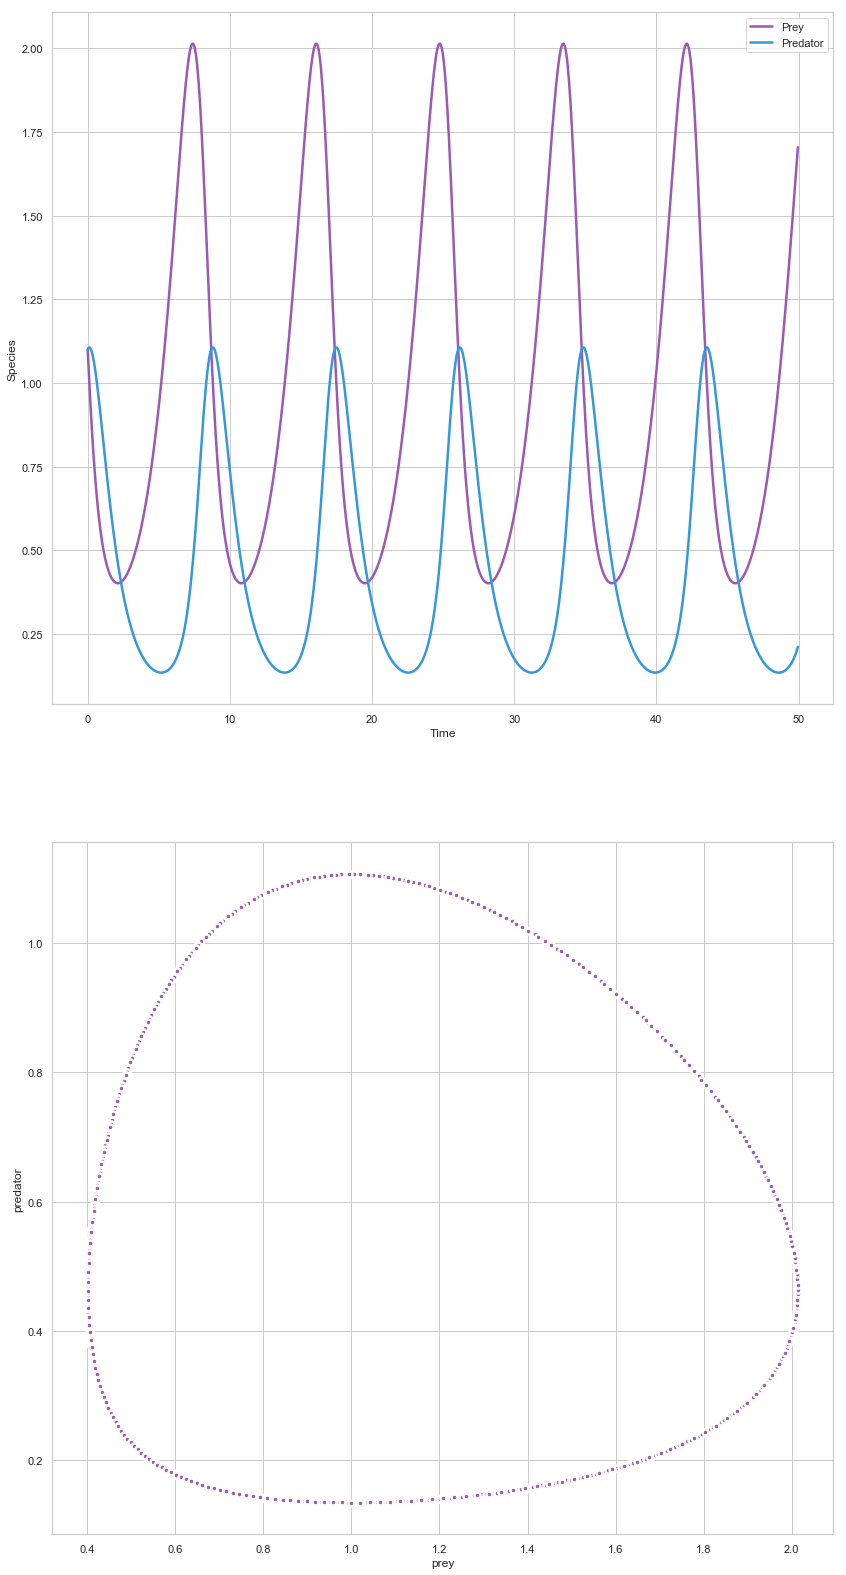

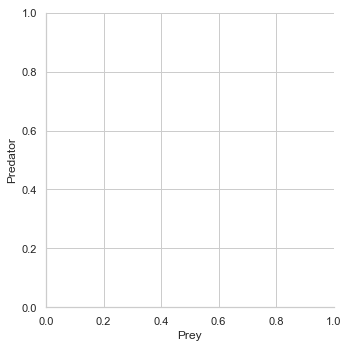

In [88]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

'''
    dx/dt = ax - bxy
    dy/dt = cxy - dy
    
    x is the number of prey 
    y is the number if predator
'''

def derivatives(variables, t, parameters):
    x, y = variables
    a, b, c, d = parameters
    #Return list of derivatives by time 
    # Be careful that the order of the return is the same as that of the variables as 
    # solving y will give x and solving the long bit gives y
    return [a* x - b * x * y, c * x * y - d * y] 

# Initial conditions
x_0 = 1.1
y_0 = 1.1
initial_conditions = [x_0, y_0]

# Parameters
a = 0.6
b = 1.3
c = 1
d = 1
# Package paramters in a list for the ODE solver
parameters = [a, b, c, d]

# Time array
t_end = 50
time_step = 0.05
t = np.arange(0.0, t_end, time_step)

print("Solving...")
solution = odeint(derivatives, initial_conditions, t, args=(parameters,))

#data = [{'t': t, 'prey': solution[:,0], 'predator': solution[:,1]}]
#data = [t, solution[:,0], solution[:,1]]

#df = pd.DataFrame(data, index=["time", "prey", "predator"])
df = pd.DataFrame({'time': t, 'prey': solution[:,0], 'predator': solution[:,1]})

#sns.set()
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.palplot(sns.dark_palette("purple"))
#sns.set_palette(sns.dark_palette("purple"))
#palette = sns.dark_palette("purple")
#palette = sns.light_palette("purple", reverse=True)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
palette = sns.color_palette(flatui)

with sns.color_palette(palette):
    print("Plotting...")
    f, axes = plt.subplots(2, figsize=(14,28))
    g_1 = sns.lineplot(x='time', y='prey', data=df, palette=palette, linewidth=2.5, label="Prey", ax=axes[0])
    g_1 = sns.lineplot(x='time', y='predator', data=df, palette=palette, linewidth=2.5, label="Predator", ax=axes[0])
    g_1.set(xlabel='Time', ylabel='Species')
    g_2 = sns.relplot(x='prey', y='predator', data=df, palette=palette, linewidth=2.5, ax=axes[1])
    g_2.set(xlabel='Prey', ylabel='Predator')
    plt.show()